In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train_full, y_train_labels), (X_test_full, y_test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Visualization of clipping

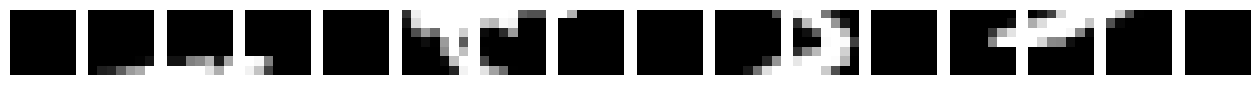

In [5]:
x = X_train_full[0:1]

clip_image = []
for i in range(4):
  clip_image.append(x[0][7*i:7*(i+1),0:7])
  clip_image.append(x[0][7*i:7*(i+1),7:14])
  clip_image.append(x[0][7*i:7*(i+1),14:21])
  clip_image.append(x[0][7*i:7*(i+1),21:28])

fig = plt.figure(figsize=(16, 4))
for i, img in enumerate(clip_image):
  fig.add_subplot(1, len(clip_image), i + 1)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
plt.show()

# Clipping Training and Testing Dataset

In [6]:
X_train_clip_raw = []
for j in range(60000):
  x_img = X_train_full[j:j+1]
  clip_image_j = []

  for i in range(4):
    clip_image_j.append(x_img[0][7*i:7*(i+1),0:7].flatten())
    clip_image_j.append(x_img[0][7*i:7*(i+1),7:14].flatten())
    clip_image_j.append(x_img[0][7*i:7*(i+1),14:21].flatten())
    clip_image_j.append(x_img[0][7*i:7*(i+1),21:28].flatten())
  X_train_clip_raw.append(np.array(clip_image_j))

X_train_clip_raw = np.array(X_train_clip_raw)

x_train_lstm = X_train_clip_raw[:, 0:15 ,:]
y_train_lstm = X_train_clip_raw[:, 1:16 ,:]

print(x_train_lstm.shape)
print(y_train_lstm.shape)

(60000, 15, 49)
(60000, 15, 49)


In [7]:
X_test_clip_raw = []
for j in range(10000):
  x_img = X_test_full[j:j+1]
  clip_image_j = []

  for i in range(4):
    clip_image_j.append(x_img[0][7*i:7*(i+1),0:7].flatten())
    clip_image_j.append(x_img[0][7*i:7*(i+1),7:14].flatten())
    clip_image_j.append(x_img[0][7*i:7*(i+1),14:21].flatten())
    clip_image_j.append(x_img[0][7*i:7*(i+1),21:28].flatten())
  X_test_clip_raw.append(np.array(clip_image_j))

X_test_clip_raw = np.array(X_test_clip_raw);

x_test_lstm = X_test_clip_raw[:, 0:15 ,:]
y_test_lstm = X_test_clip_raw[:, 1:16 ,:]

print(x_test_lstm.shape)
print(y_test_lstm.shape)

(10000, 15, 49)
(10000, 15, 49)


# LSTM Model

In [ ]:
def train_lstm(x_train_input, y_train_input, x_test_input, y_test_input):
  x_train = tf.cast(x_train_input, dtype=tf.float32) / 255.0
  y_train = tf.cast(y_train_input, dtype=tf.float32) / 255.0
  x_test = tf.cast(x_test_input, dtype=tf.float32) / 255.0
  y_test = tf.cast(y_test_input, dtype=tf.float32) / 255.0

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(64, return_sequences=True))
  model.add(tf.keras.layers.LSTM(64, return_sequences=True))
  model.add(tf.keras.layers.Dense(49, activation="sigmoid"))
  optimizer = tf.keras.optimizers.Adam()
  loss_fn = tf.keras.losses.MeanSquaredError()

  batch_size = 100
  num_epochs = 100

  num_batches = x_train.shape[0] // batch_size

  training_losses = []
  validation_losses = []

  for epoch in tf.range(num_epochs):
      tf.print("\nEpoch:", epoch + 1)
      epoch_loss_sum = tf.constant(0.0, dtype=tf.float32)

      idx = tf.random.shuffle(tf.range(x_train.shape[0]))

      for b in tf.range(num_batches):
          batch_idx_slice = idx[b * batch_size : (b + 1) * batch_size]

          xb = tf.gather(x_train, batch_idx_slice)
          yb = tf.gather(y_train, batch_idx_slice)

          with tf.GradientTape() as tape:
              y_pred = model(xb, training=True)
              loss = loss_fn(yb, y_pred)

          grads = tape.gradient(loss, model.trainable_variables)
          optimizer.apply_gradients(zip(grads, model.trainable_variables))

          epoch_loss_sum += loss

      avg_epoch_loss = epoch_loss_sum / tf.cast(num_batches, dtype=tf.float32)
      training_losses.append(avg_epoch_loss.numpy())
      tf.print("Training loss:", avg_epoch_loss)

      y_val_pred = model(x_test, training=False)
      val_loss = loss_fn(y_test, y_val_pred);
      validation_losses.append(val_loss.numpy())
      tf.print("Validation loss:", val_loss)

  return model, training_losses, validation_losses

model, training_losses, validation_losses  = train_lstm(x_train_lstm, y_train_lstm, x_test_lstm, y_test_lstm)


Epoch: 1
Training loss: 0.090744324
Validation loss: 0.0666671842

Epoch: 2
Training loss: 0.0594350062
Validation loss: 0.054198347

Epoch: 3
Training loss: 0.0513499938
Validation loss: 0.0486764871

Epoch: 4
Training loss: 0.0468223281
Validation loss: 0.0448482372

Epoch: 5
Training loss: 0.0437356
Validation loss: 0.0423213094

Epoch: 6
Training loss: 0.0415096879
Validation loss: 0.0403741188

Epoch: 7
Training loss: 0.0398332737
Validation loss: 0.0388971604

Epoch: 8
Training loss: 0.0385816097
Validation loss: 0.0378852971

Epoch: 9
Training loss: 0.0375862718
Validation loss: 0.0368224

Epoch: 10
Training loss: 0.036792282
Validation loss: 0.0361696333

Epoch: 11
Training loss: 0.0360824913
Validation loss: 0.0355823971

Epoch: 12
Training loss: 0.0354954116
Validation loss: 0.0349777602

Epoch: 13
Training loss: 0.0349774398
Validation loss: 0.0344964936

Epoch: 14
Training loss: 0.0345121
Validation loss: 0.0341640674

Epoch: 15
Training loss: 0.0340973809
Validation loss:

# Training and Validation loss curve and model convergence

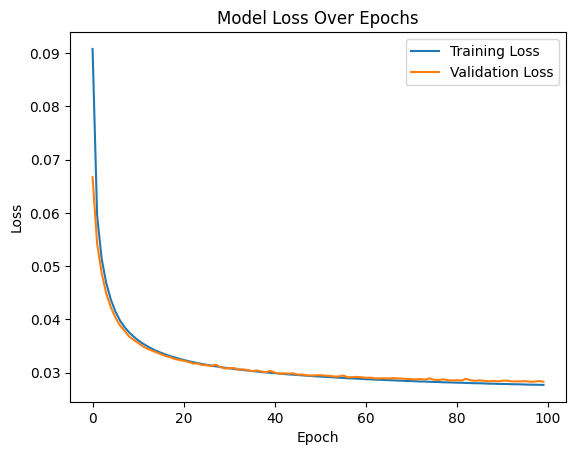

In [ ]:
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.save('lstm_model_4_1.h5')

In [8]:
model = tf.keras.models.load_model('lstm_model_4_1.h5')

# Output image generation

In [25]:
chosen_digit = [0,1,2,3,4,5,6,7,8,9]

all_original_images = []
all_generated_images = []

for c in chosen_digit:
  indices = np.where(y_test_labels == c)[0]

  for id in range(10):

    idx = indices[id]

    original_28x28_img = X_test_full[idx]

    x_to_predict = original_28x28_img[np.newaxis, :, :]
    current_clip_patches = []
    for i_patch in range(4):
      current_clip_patches.append(x_to_predict[0][7*i_patch:7*(i_patch+1),0:7].flatten())
      current_clip_patches.append(x_to_predict[0][7*i_patch:7*(i_patch+1),7:14].flatten())
      current_clip_patches.append(x_to_predict[0][7*i_patch:7*(i_patch+1),14:21].flatten())
      current_clip_patches.append(x_to_predict[0][7*i_patch:7*(i_patch+1),21:28].flatten())
    current_clip_patches = np.array(current_clip_patches)
    seq_normalized = tf.cast(current_clip_patches, dtype=tf.float32) / 255.0
    known_top = seq_normalized[0:8]

    input_seq = tf.reshape(known_top, (1, 8, 49))

    lstm_layer_1 = model.layers[0]
    lstm_layer_2 = model.layers[1]
    dense_layer  = model.layers[2]


    h1 = tf.zeros((1, 64))
    c1 = tf.zeros((1, 64))
    h2 = tf.zeros((1, 64))
    c2 = tf.zeros((1, 64))

    for t in range(8):
        x_t = tf.reshape(known_top[t], (1,49))
        a1, [h1, c1] = lstm_layer_1.cell(x_t, states=[h1,c1])
        a2, [h2, c2] = lstm_layer_2.cell(h1, states=[h2,c2])

    generated_bottom = []
    last_input = tf.reshape(known_top[-1], (1,49))


    for step in range(8):
        o1, [h1, c1] = lstm_layer_1.cell(last_input, states=[h1,c1])
        o2, [h2, c2] = lstm_layer_2.cell(o1, states=[h2,c2])
        y = dense_layer(o2)
        generated_bottom.append(y.numpy().reshape(49))
        last_input = y

    generated_bottom = np.array(generated_bottom)


    full_16_normalized = np.concatenate([known_top, generated_bottom], axis=0)
    full_16_denormalized = (full_16_normalized * 255).astype(np.uint8)


    generated_img = np.zeros((28,28), dtype=np.uint8)

    generated_img[0:7,0:7] = full_16_denormalized[0].reshape(7,7)
    generated_img[0:7,7:14] = full_16_denormalized[1].reshape(7,7)
    generated_img[0:7,14:21] = full_16_denormalized[2].reshape(7,7)
    generated_img[0:7,21:28] = full_16_denormalized[3].reshape(7,7)

    generated_img[7:14,0:7] = full_16_denormalized[4].reshape(7,7)
    generated_img[7:14,7:14] = full_16_denormalized[5].reshape(7,7)
    generated_img[7:14,14:21] = full_16_denormalized[6].reshape(7,7)
    generated_img[7:14,21:28] = full_16_denormalized[7].reshape(7,7)

    generated_img[14:21,0:7] = full_16_denormalized[11].reshape(7,7)
    generated_img[14:21,7:14] = full_16_denormalized[8].reshape(7,7)
    generated_img[14:21,14:21] = full_16_denormalized[9].reshape(7,7)
    generated_img[14:21,21:28] = full_16_denormalized[10].reshape(7,7)

    generated_img[21:28,0:7] = full_16_denormalized[15].reshape(7,7)
    generated_img[21:28,7:14] = full_16_denormalized[12].reshape(7,7)
    generated_img[21:28,14:21] = full_16_denormalized[13].reshape(7,7)
    generated_img[21:28,21:28] = full_16_denormalized[14].reshape(7,7)

    all_original_images.append(original_28x28_img)
    all_generated_images.append(generated_img)



In [19]:
len(all_original_images)

100

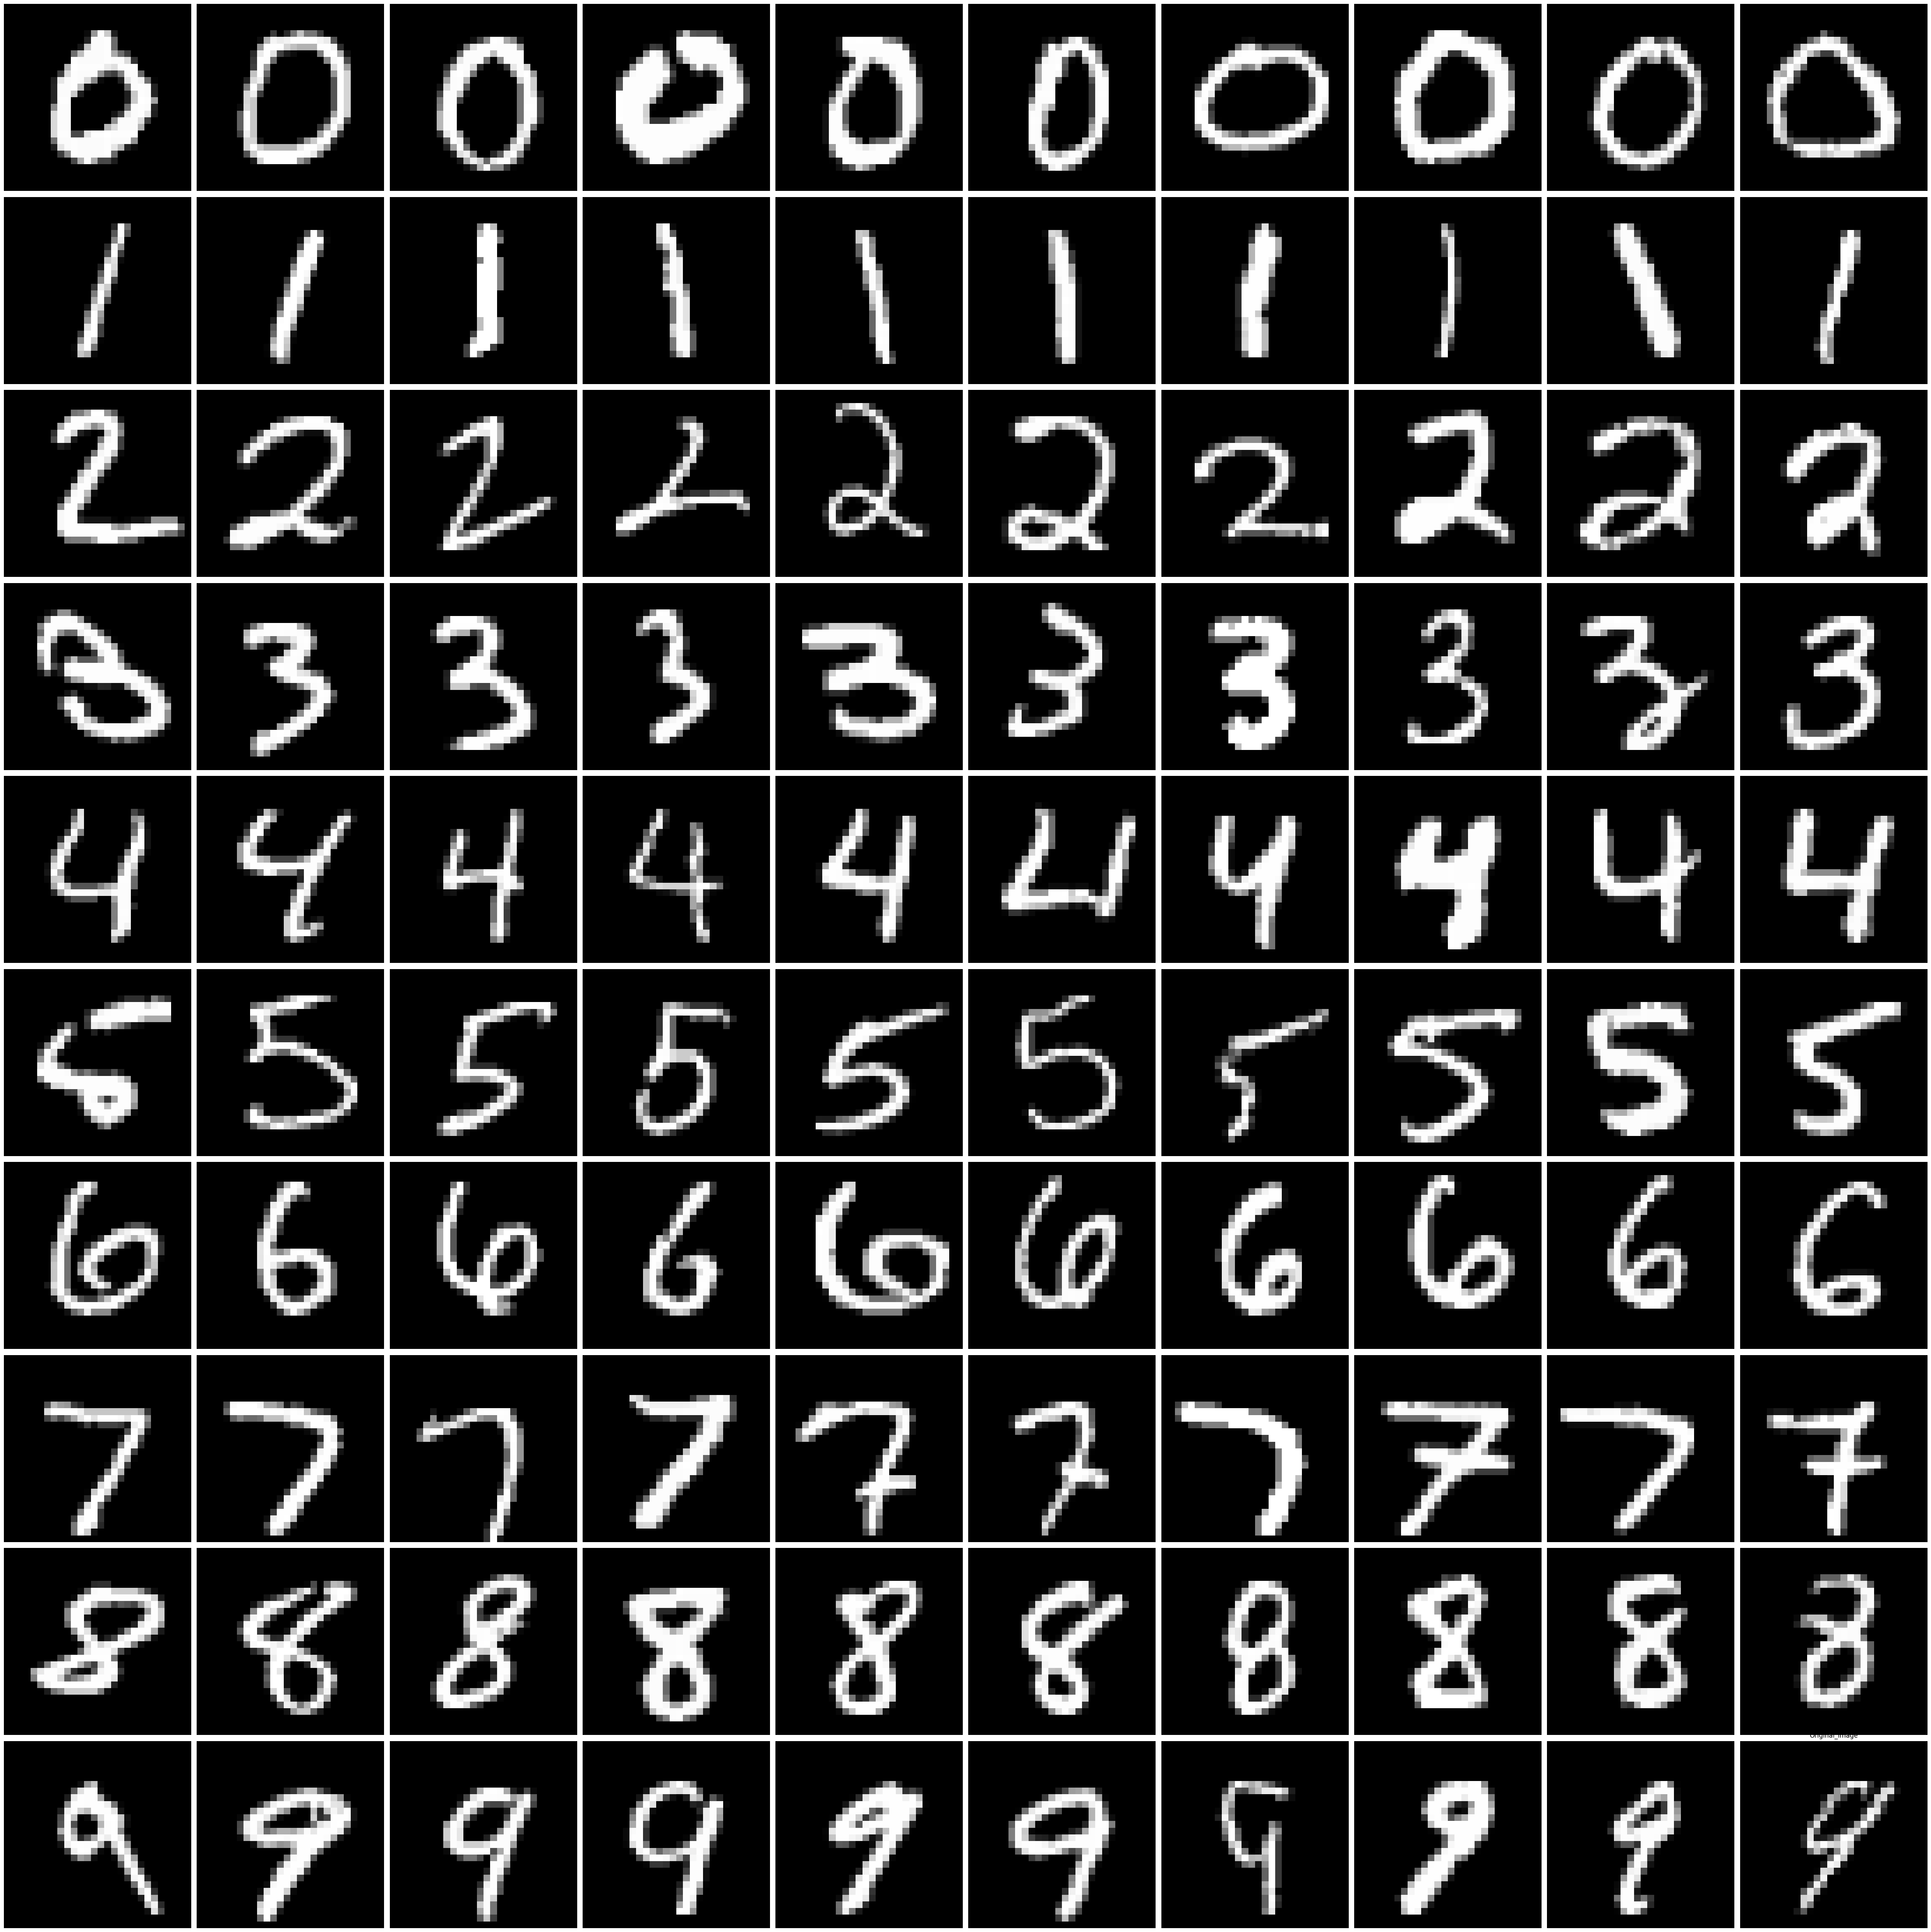

In [28]:
plt.figure(figsize=(50, 50))

for i in range(len(all_original_images)):
    plt.subplot(10, 10, i + 1)
    plt.imshow(all_original_images[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.title('Original_image')
plt.show()

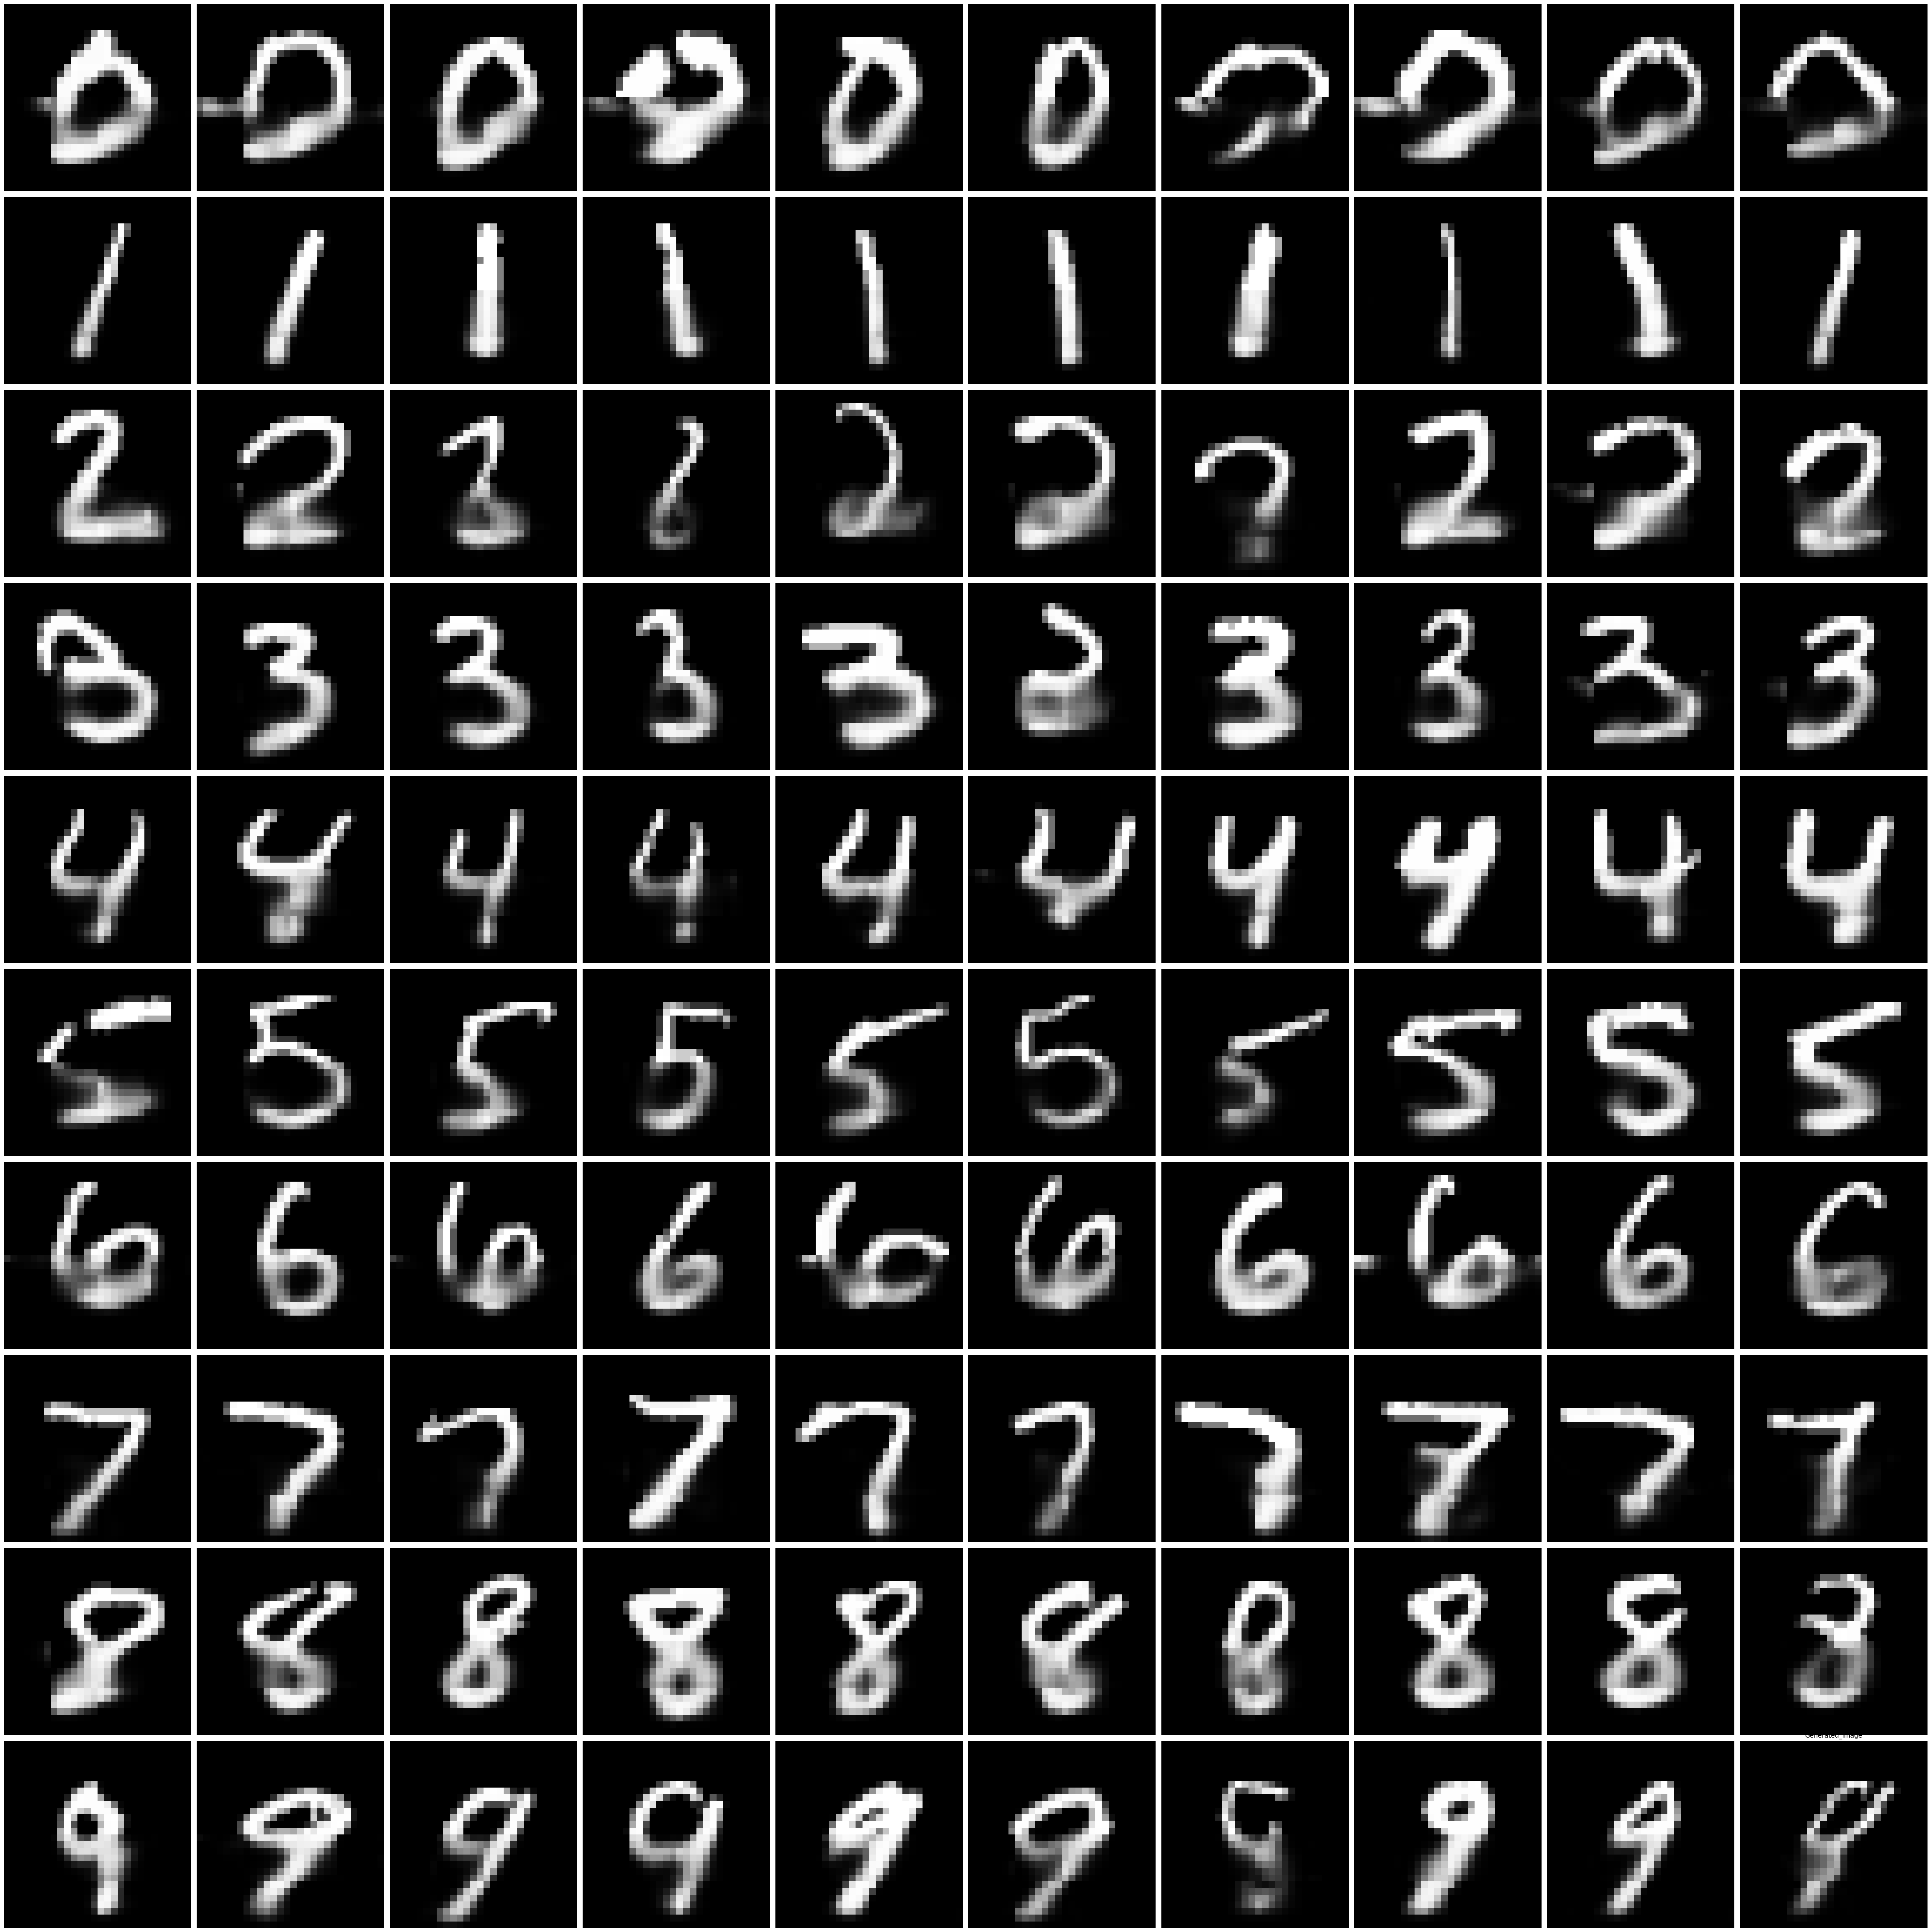

In [30]:
plt.figure(figsize=(50, 50))

for i in range(len(all_original_images)):
    plt.subplot(10, 10, i + 1)
    plt.imshow(all_generated_images[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.title('Generated_image')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files

!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Copy of DLS_HW4_1.ipynb"
files.download("/content/drive/MyDrive/Colab Notebooks/Copy of DLS_HW4_1.html")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Copy of DLS_HW4_1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 468692 bytes to /content/drive/MyDrive/Colab Notebooks/Copy of DLS_HW4_1.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>